# Explore here

In [33]:
import pandas as pd 
import numpy as np 

In [34]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data.head() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [36]:
data.shape

(48895, 16)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [38]:
print(data.drop("id", axis = 1).duplicated().sum())

0


In this case there are no accommodations duplicated. 

In [39]:
data.drop(["host_id", "id", "latitude", "longitude", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2


ANÁLISIS CATEGÓRICO 

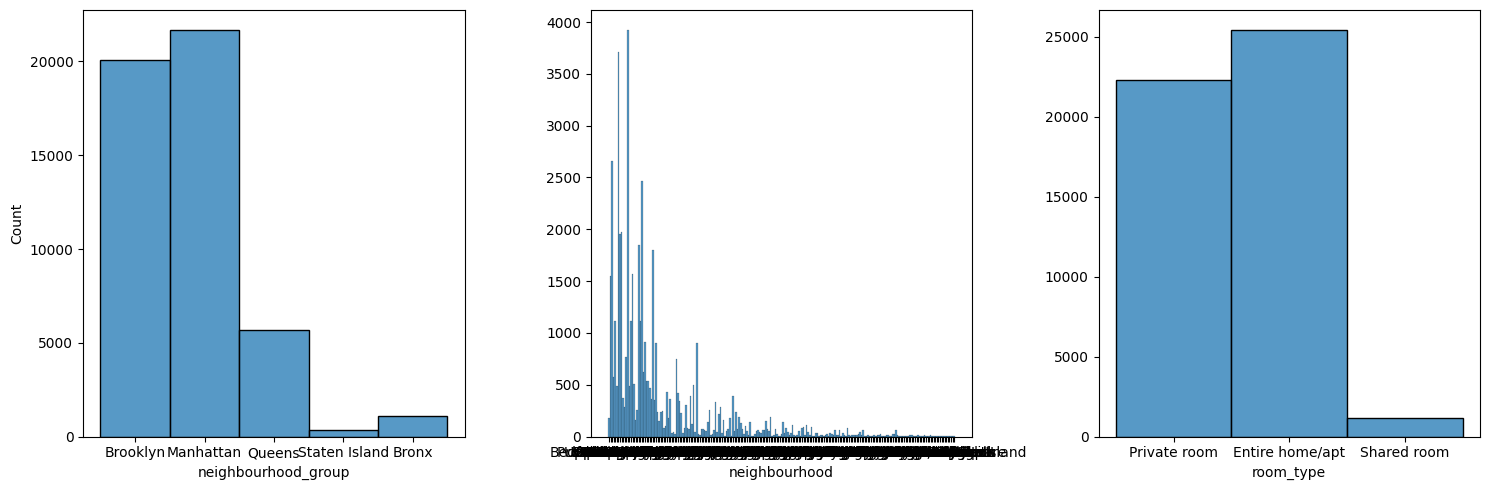

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = data, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = data, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2], data = data, x = "room_type").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- 80% of the listed accomodations are located in two of the five neighbourhoods (brooklyn and manhattan).
- 95% of the listed accomodations are NOT shred rooms, these are either private rooms or ertire homes equaly diveded. 

ANÁLISIS NUMÉRICO

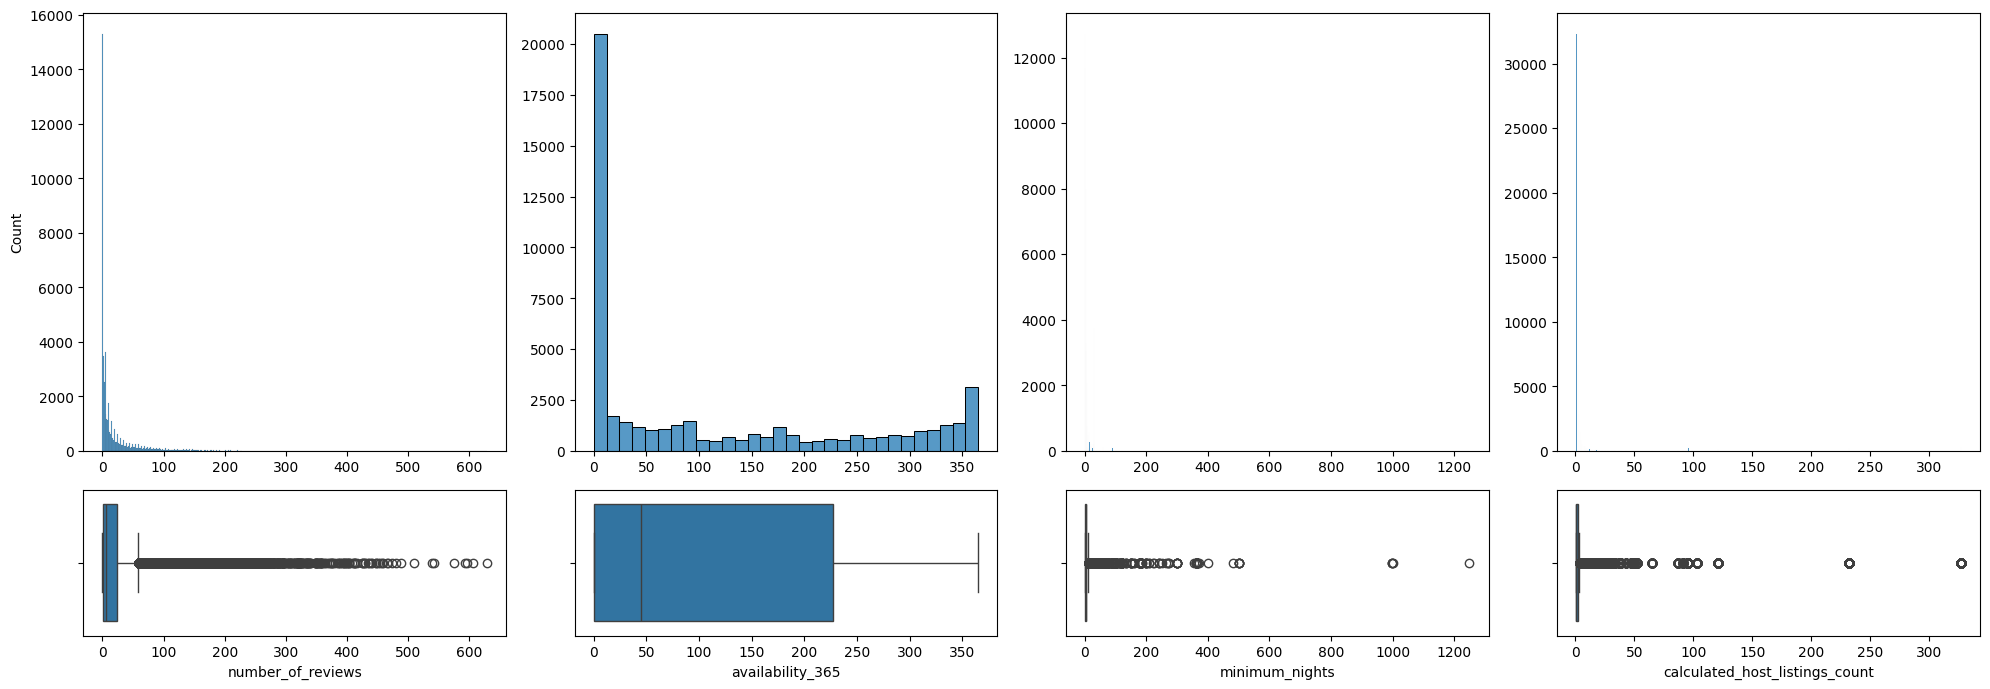

In [41]:
fig, axis = plt.subplots(2, 4, figsize = (20, 7), gridspec_kw={'height_ratios': [6, 2]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "number_of_reviews")
sns.histplot(ax = axis[0, 1], data = data, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "availability_365")
sns.histplot(ax = axis[0, 2], data = data, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data, x = "minimum_nights")
sns.histplot(ax = axis[0, 3], data = data, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = data, x = "calculated_host_listings_count")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Outlayers

ANÁLISIS NUMÉRICO - NUMÉRICO

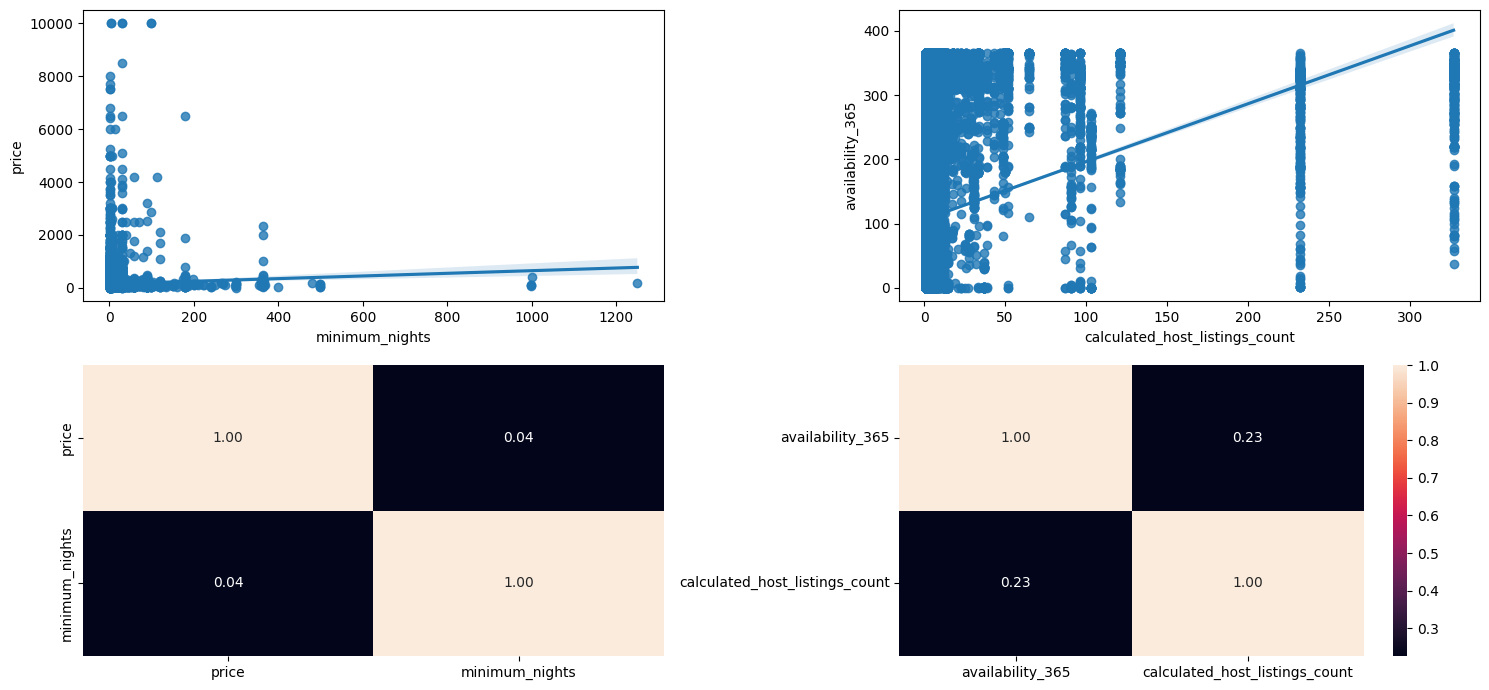

In [42]:
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data, x = "minimum_nights", y = "price")
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data, x = "calculated_host_listings_count", y = "availability_365")
sns.heatmap(data[["availability_365", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

ANÁLISIS CATEGÓRICO-CATEGÓRICO

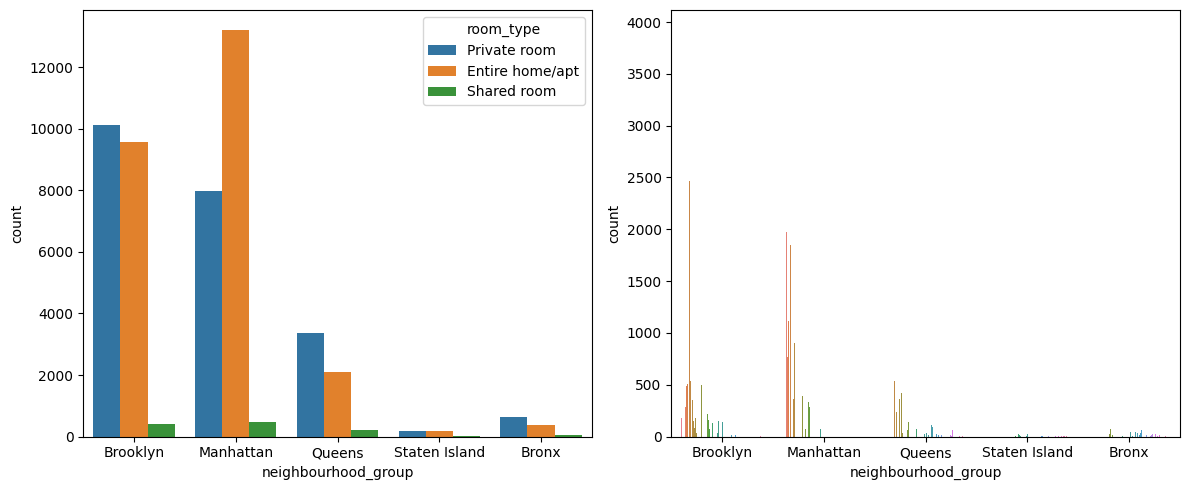

In [43]:
fig, axis = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(ax = axis[0], data = data, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = data, x = "neighbourhood_group", hue = "neighbourhood", legend = False)

plt.tight_layout()

plt.show()

In [44]:
data["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

Factorizing categoric variables

In [45]:
data["neighbourhood_group_n"] = pd.factorize(data["neighbourhood_group"])[0]

neighbourhood_group_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"] for _, row in data[["neighbourhood_group", "neighbourhood_group_n"]].drop_duplicates().iterrows()}

import json

with open("neighbourhood_group_rules.json", "w") as f:
  json.dump(neighbourhood_group_rules, f)

In [46]:
data["room_type_n"] = pd.factorize(data["room_type"])[0]

room_type_rules = {row["room_type"]: row["room_type_n"] for _, row in data[["room_type", "room_type_n"]].drop_duplicates().iterrows()}

import json

with open("room_type_rules.json", "w") as f:
  json.dump(room_type_rules, f)

In [82]:
data["neighbourhood_n"] = pd.factorize(data["neighbourhood"])[0]

neighbourhood_rules = {row["neighbourhood"]: row["neighbourhood_n"] for _, row in data[["neighbourhood", "neighbourhood_n"]].drop_duplicates().iterrows()}

import json

with open("neighbourhood_rules.json", "w") as f:
  json.dump(neighbourhood_rules, f)

Correlacion categoricas

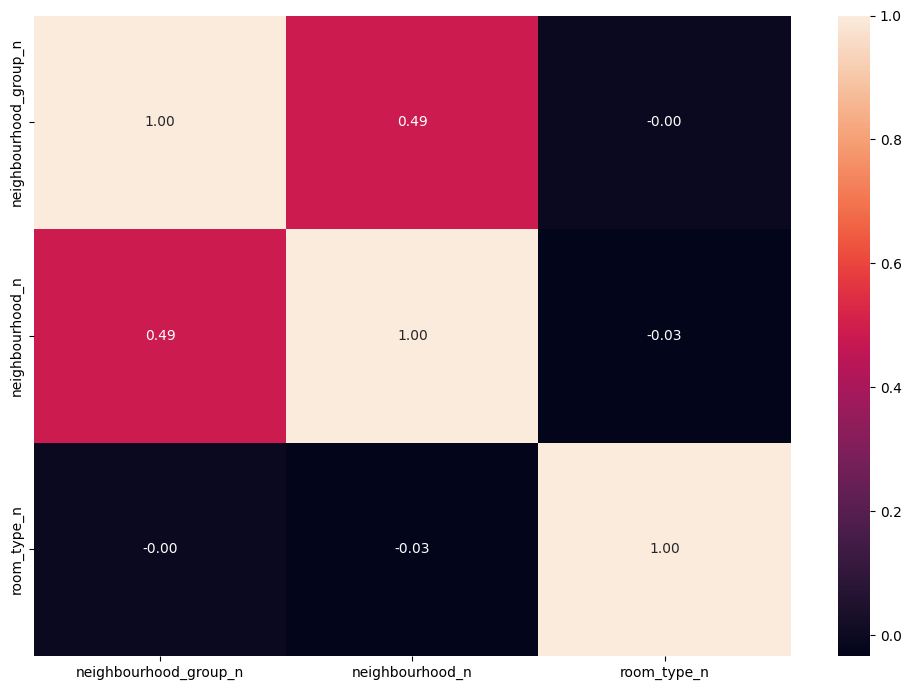

In [85]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(data[["neighbourhood_group_n", "neighbourhood_n", "room_type_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Correlation analysis 

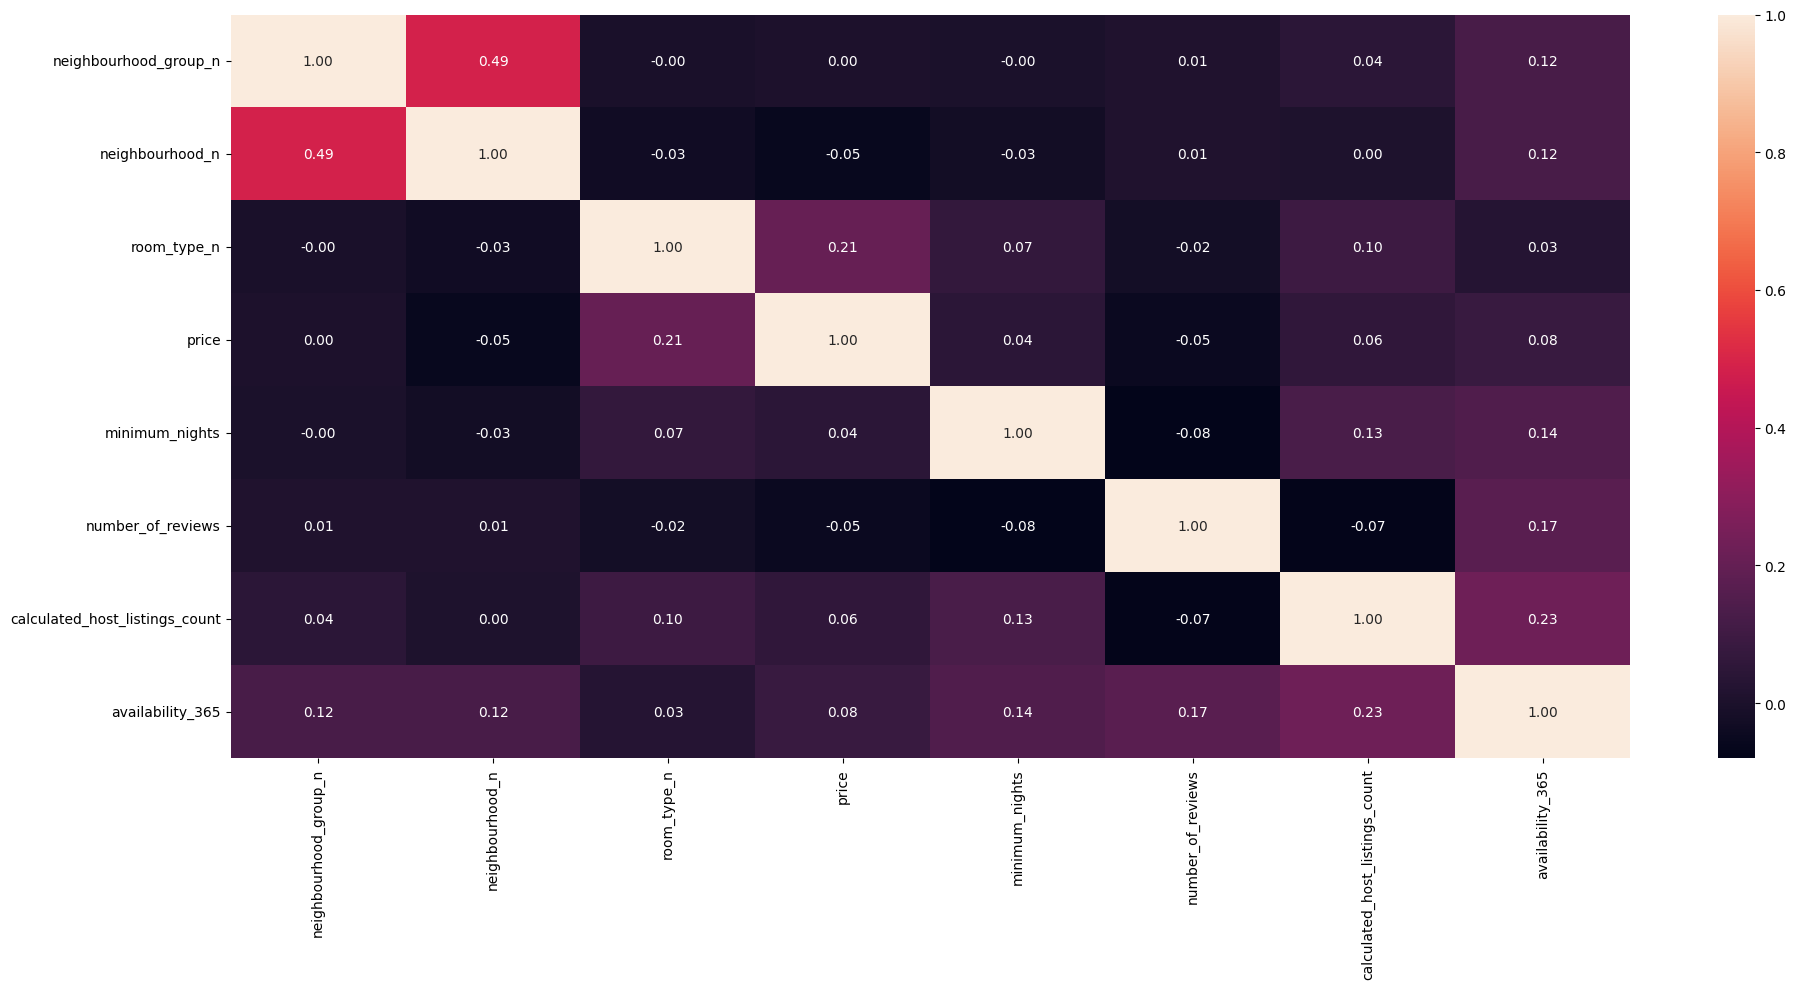

In [48]:
data["neighbourhood_group_n"] = pd.factorize(data["neighbourhood_group"])[0]
data["room_type_n"] = pd.factorize(data["room_type"])[0]

fig, axis = plt.subplots(figsize = (20, 10))

sns.heatmap(data[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

"Strong" relations: (price - room_type) & (availability_365 - calculated_host_listings_count)

DIA 2 

In [49]:
data.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327,0.786911,0.567113,29.888782
std,240.154170,20.510550,44.550582,32.952519,131.622289,0.844386,0.541249,34.676634
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000,4.000000,2.000000,220.000000


The variables 'price', 'minimum_nights', 'number of reviews', and 'calculated_host_listings_count' seem to have outliers. 

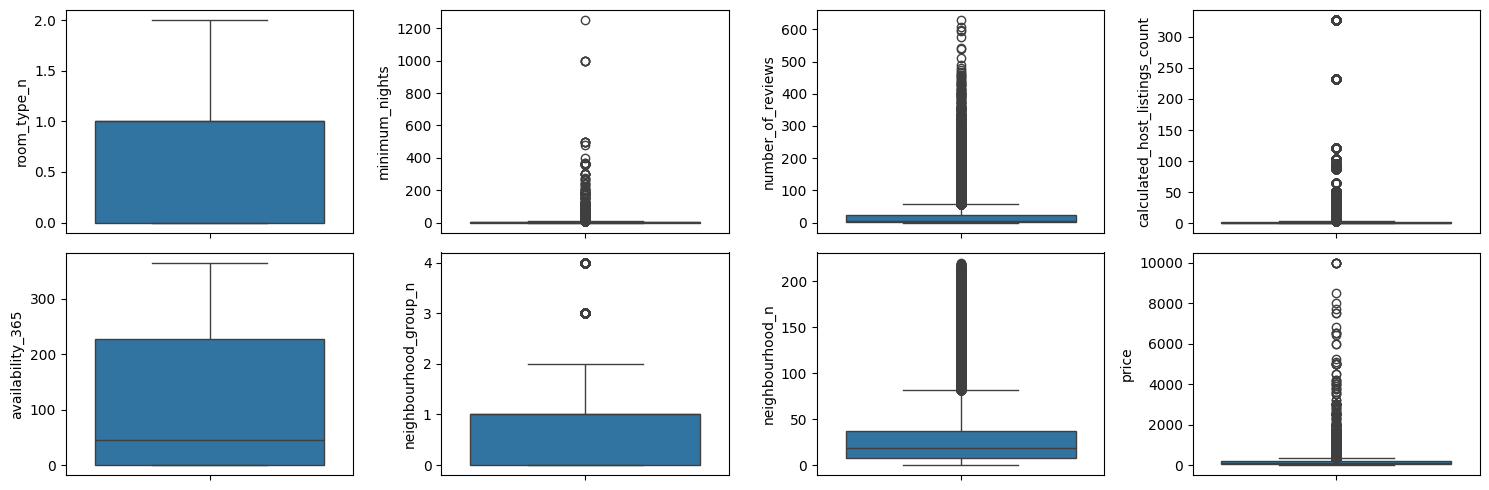

In [50]:
fig, axis = plt.subplots(2, 4, figsize = (15, 5))

sns.boxplot(ax = axis[0, 0], data = data, y = "room_type_n")
sns.boxplot(ax = axis[0, 1], data = data, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = data, y = "number_of_reviews")
sns.boxplot(ax = axis[0, 3], data = data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 0], data = data, y = "availability_365")
sns.boxplot(ax = axis[1, 1], data = data, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[1, 2], data = data, y = "neighbourhood_n")
sns.boxplot(ax = axis[1, 3], data = data, y = "price")

plt.tight_layout()

plt.show()

In [51]:
data.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327,0.786911,0.567113,29.888782
std,240.154170,20.510550,44.550582,32.952519,131.622289,0.844386,0.541249,34.676634
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000,4.000000,2.000000,220.000000


In [77]:
import json

data_con_outliers = data.copy()
data_sin_outliers = data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(data[column])
  
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["minimum_nights", "number_of_reviews", "calculated_host_listings_count"]:
  data_sin_outliers, limits_list = replace_outliers_from_column(column, data_sin_outliers)
  outliers_dict[column] = limits_list

# with open("outliers_replacement.json", "w") as f:
#   json.dump(outliers_dict, f)
outliers_dict

{'minimum_nights': [1, np.float64(11.0)],
 'number_of_reviews': [0, np.float64(58.5)],
 'calculated_host_listings_count': [1, np.float64(3.5)]}

In [55]:
data_sin_outliers

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,Brooklyn,Kensington,Private room,149,1.0,9.0,3.5,365,0,0,0
1,Manhattan,Midtown,Entire home/apt,225,1.0,45.0,2.0,355,1,1,1
2,Manhattan,Harlem,Private room,150,3.0,0.0,1.0,365,1,0,2
3,Brooklyn,Clinton Hill,Entire home/apt,89,1.0,58.5,1.0,194,0,1,3
4,Manhattan,East Harlem,Entire home/apt,80,10.0,9.0,1.0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2.0,0.0,2.0,9,0,0,6
48891,Brooklyn,Bushwick,Private room,40,4.0,0.0,2.0,36,0,0,21
48892,Manhattan,Harlem,Entire home/apt,115,10.0,0.0,1.0,27,1,1,2
48893,Manhattan,Hell's Kitchen,Shared room,55,1.0,0.0,3.5,2,1,2,7


In [58]:
data_con_outliers.isnull().sum().sort_values(ascending=False)
data_sin_outliers.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
room_type_n                       0
neighbourhood_n                   0
dtype: int64

In [60]:
data.isnull().sum().sort_values(ascending=False) / len(data)

neighbourhood_group               0.0
neighbourhood                     0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
neighbourhood_group_n             0.0
room_type_n                       0.0
neighbourhood_n                   0.0
dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
import os 

num_variables = ["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = data_con_outliers.drop("price", axis = 1)[num_variables]
X_sin_outliers = data_sin_outliers.drop("price", axis = 1)[num_variables]
y = data_con_outliers["price"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

X_train_con_outliers.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0,12,1,3,11,1,1
23615,1,30,0,2,2,1,0
31183,0,6,0,2,0,2,0
29260,0,6,1,3,87,1,267
7275,2,31,0,5,13,1,0


In [70]:
from sklearn.preprocessing import StandardScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = StandardScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,-0.931915,-0.514100,0.798949,-0.193025,-0.277198,-0.186570,-0.852862
23615,0.256169,0.005517,-1.050482,-0.239596,-0.479451,-0.186570,-0.860447
31183,-0.931915,-0.687306,-1.050482,-0.239596,-0.524396,-0.156424,-0.860447
29260,-0.931915,-0.687306,0.798949,-0.193025,1.430714,-0.186570,1.164663
7275,1.444253,0.034385,-1.050482,-0.099884,-0.232253,-0.186570,-0.860447


In [73]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0.00,0.054545,0.5,0.001601,0.017488,0.000000,0.002740
23615,0.25,0.136364,0.0,0.000801,0.003180,0.000000,0.000000
31183,0.00,0.027273,0.0,0.000801,0.000000,0.003067,0.000000
29260,0.00,0.027273,0.5,0.001601,0.138315,0.000000,0.731507
7275,0.50,0.140909,0.0,0.003203,0.020668,0.000000,0.000000


PARTE 3

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_con_outliers_scal, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers_scal), columns = X_train_con_outliers_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers_scal), columns = X_test_con_outliers_scal.columns.values[ix])

# GUARDO X_train_sel.columns
import json

with open("feature_selection_k_5.json", "w") as f:
  json.dump(X_train_sel.columns.tolist(), f)


X_train_sel.head()

,neighbourhood_n,room_type_n,minimum_nights,calculated_host_listings_count,availability_365
0,0.054545,0.5,0.001601,0.000000,0.002740
1,0.136364,0.0,0.000801,0.000000,0.000000
2,0.027273,0.0,0.000801,0.003067,0.000000
3,0.027273,0.5,0.001601,0.000000,0.731507
4,0.140909,0.0,0.003203,0.000000,0.000000


In [86]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

In [87]:
X_train_sel.to_csv("../data/processed/X_train_sel_k5.csv", index=False)
X_test_sel.to_csv("../data/processed/X_test_sel_k5.csv", index=False)